In [1]:
using HDF5
using Plots
using Measures

In [2]:
# Filenames
f_ts = "data/timeseries/"
f_defects = "data/defects/"

"data/defects/"

In [3]:
# Load data
defects = []
evolutions = []
ntsteps = 500
instances = 1:300:1920

for i in instances
    f_d = h5open(string(f_defects,"$(i)"))
    push!(defects,read(f_d["defect"]))
    f_t = h5open(string(f_ts,"$(i)"))
    evol = []
    for j=1:ntsteps
        push!(evol, read(f_t["u$(j)"]))
    end 
    push!(evolutions,evol)
    close(f_d)
    close(f_t)
end 

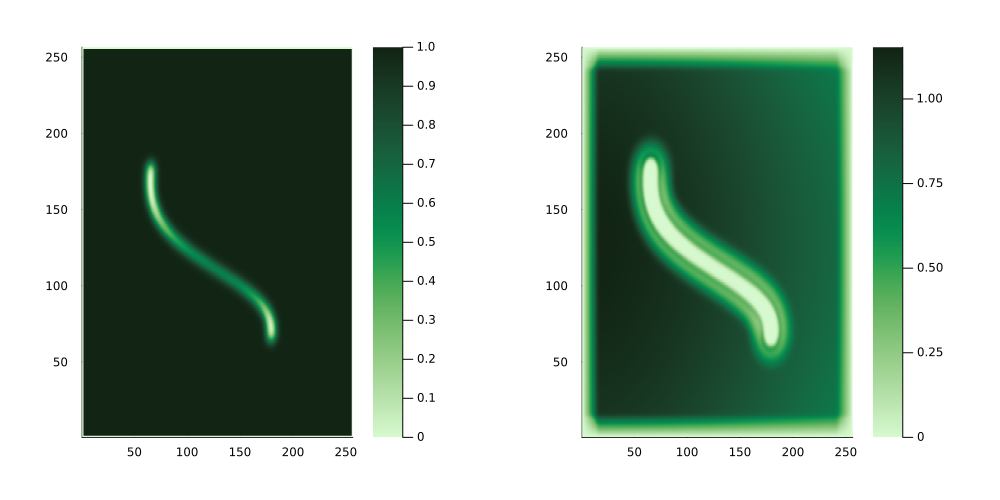

In [4]:
# Visualize randomly
r = rand(1:length(instances))
d = defects[r]
evols = evolutions[r]

f1 = heatmap(d,c=:algae,margin=10mm)
f2 = heatmap(evols[1],c=:algae,margin=10mm)
plot(f1,f2,size=(1000,500))


In [5]:
# Timeseries 
anim = @animate for i=1:ntsteps
    heatmap(evols[i],c=:algae,margin=10mm,title="$(i)",clim=(-1,1))
end 
gif(anim,"eda/ts.gif",fps=10);

[ Info: Saved animation to /nfs/c3po/home/ge96gak/FWI/eda/ts.gif


In [6]:
# Plot timeseries
nsensors = 20
loc_sensors = 3:floor(Int,256/nsensors):253
ts = zeros(length(loc_sensors), ntsteps)
for i=1:ntsteps
    ts[:,i] .= evols[i][3,loc_sensors]
end 

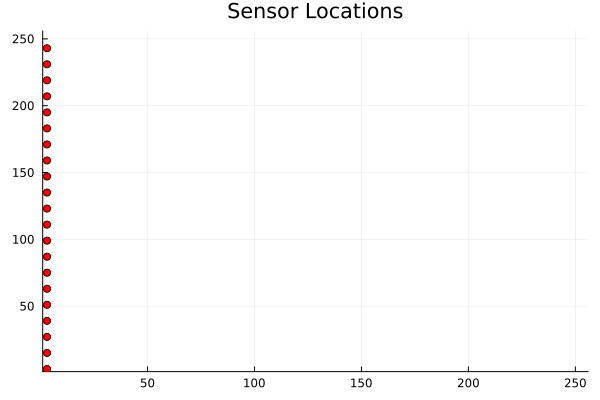

In [7]:
# Show sensor locations
xlocs = 3*ones(length(loc_sensors))
ylocs = loc_sensors
scatter(xlocs,ylocs,color=:red,title="Sensor Locations",xlim=[1,256],ylim=[1,256],label=false)

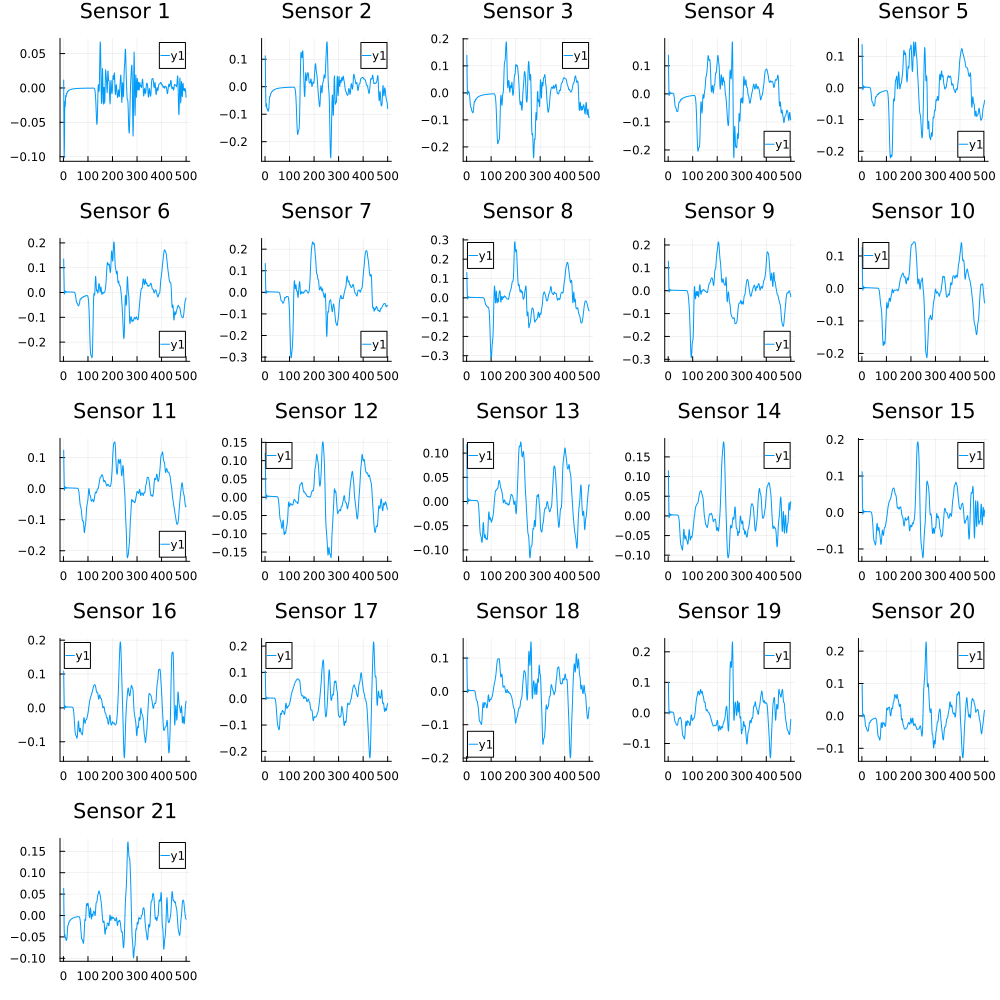

In [8]:
figures = []
for i=1:length(loc_sensors)
    push!(figures, plot(ts[i,:],title="Sensor $(i)"))
end
plot(figures...,size=(1000,1000))